In [59]:
import pandas as pd
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn.model_selection import train_test_split 
import array as arr

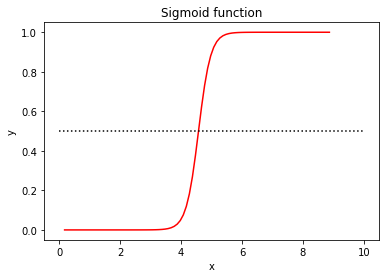

In [60]:
# implement a sigmoid function by hand
def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a
# evaluate the sigmoid at some x values
sigm = np.arange(-22, 22, 0.5)
# plot the sigmoid
plt.plot(sigm*0.2+4.57, np.array(sigmoid(sigm)), color = "red") # manually implemented sigmoid
plt.plot([0,10], [0.5, 0.5], linestyle = "dotted", color = "black") 
plt.title("Sigmoid function")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


In [61]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'outcome'] # load dataset 
pima = pd.read_csv("diabetes.csv", header=None, names=col_names) 
pima.head() 

# split data into features/inputs and targets/outputs
feature_cols = ['pregnant', 'insulin', 'bmi',
                'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols] # features
y = pima.outcome # target variable
# split data into training and validation datasets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [62]:
from sklearn.linear_model import LogisticRegression
# instantiate the model
model = LogisticRegression()

In [63]:
# fitting the model
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
coefficents = {"Features": ["Intercept"] + feature_cols,
              "Coefficients":np.concatenate((model.intercept_ ,model.coef_[0]))}
coefficents = pd.DataFrame(coefficents)
coefficents

,Features,Coefficients
0,Intercept,-8.050451
1,pregnant,0.089691
2,insulin,-0.000472
3,bmi,0.094244
4,age,0.022995
5,glucose,0.030583
6,bp,-0.015030
7,pedigree,1.025445


In [65]:
y_pred = model.predict(X_test)
y_pred[0:5]
#out:
arr.array('i',[1, 0, 0, 1, 0])

array('i', [1, 0, 0, 1, 0])

In [66]:
# metrics
print("Accuracy for test set is {}.".format(round(metrics.accuracy_score(y_test, y_pred), 4)))
print("Precision for test set is {}.".format(round(metrics.precision_score(y_test, y_pred), 4)))
print("Recall for test set is {}.".format(round(metrics.recall_score(y_test, y_pred), 4)))

Accuracy for test set is 0.8073.
Precision for test set is 0.7451.
Recall for test set is 0.6129.


In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       130
           1       0.75      0.61      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



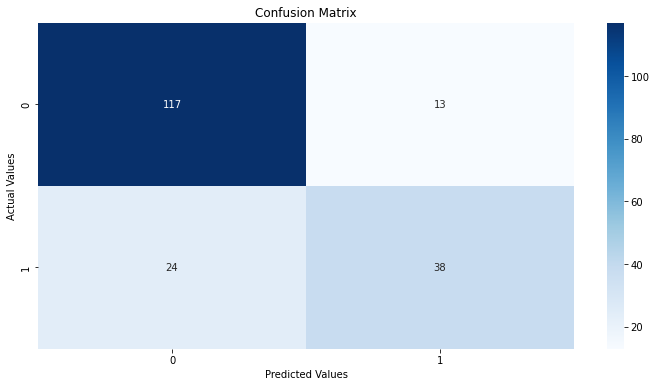

In [68]:
#confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
# plotting the confusion matrix
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

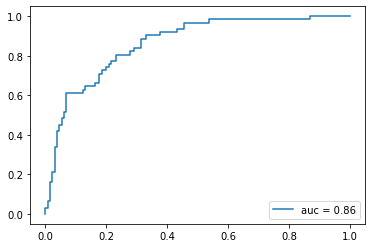

In [73]:
# ROC curve
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="auc = " + str(round(auc,2)))
plt.legend(loc=4)
plt.show()